In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('NCAA data.xlsx', sheet_name='2016-2017 ')

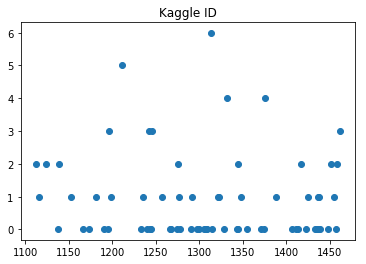

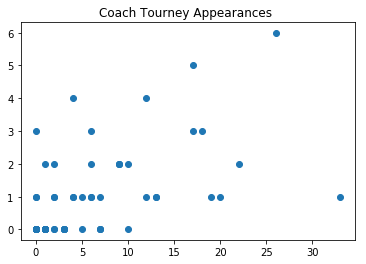

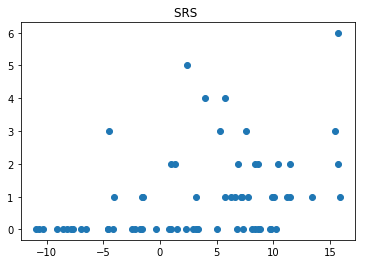

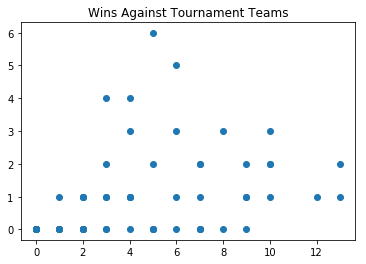

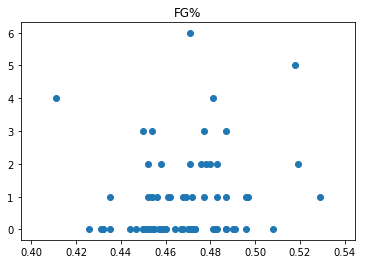

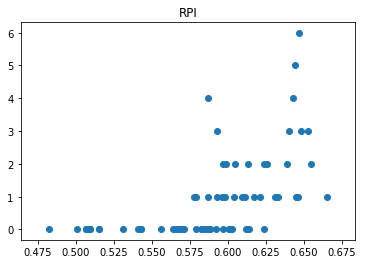

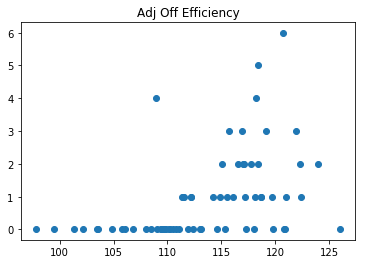

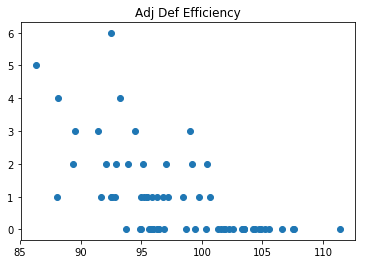

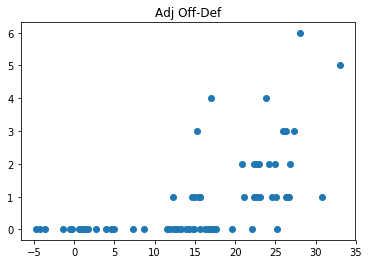

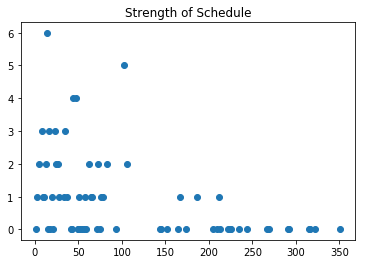

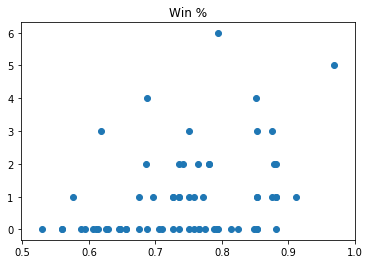

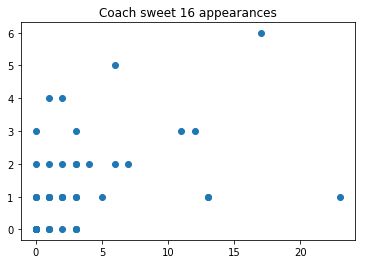

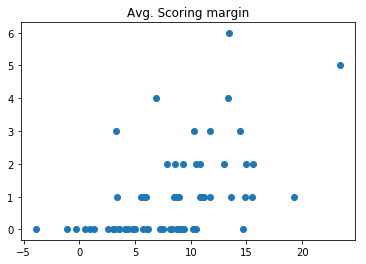

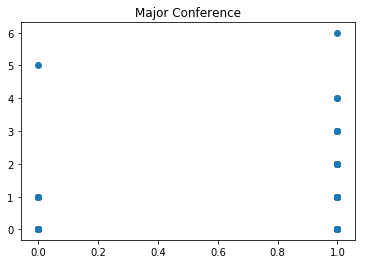

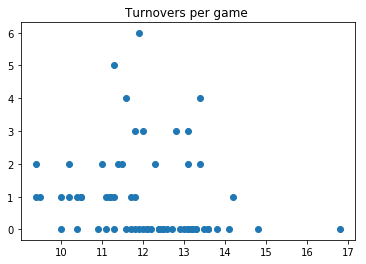

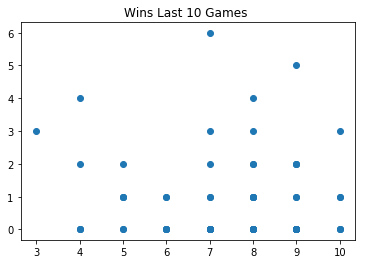

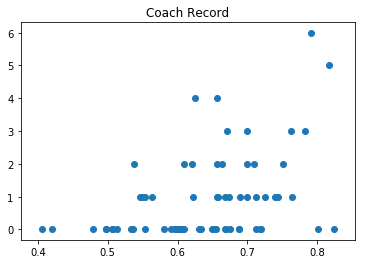

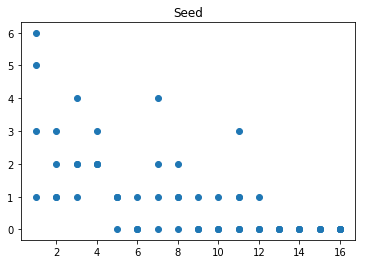

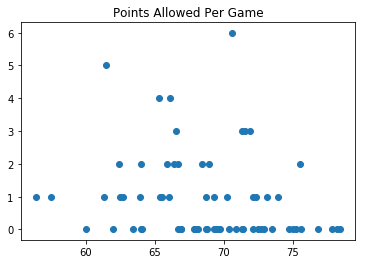

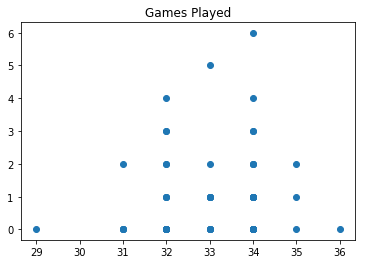

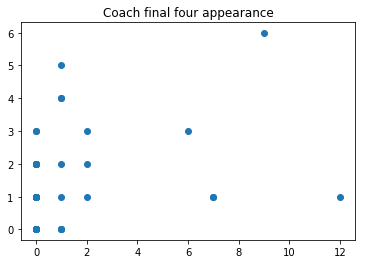

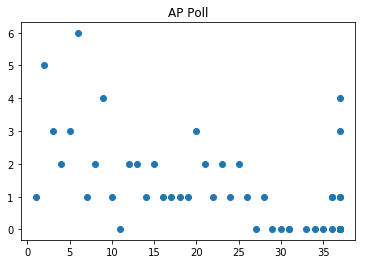

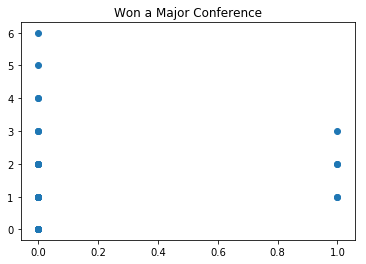

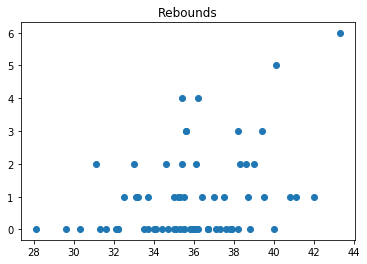

In [2]:
y = np.array(df['tournament wins'])

for var in list(df):
    if var != 'tournament wins' and var != 'Team Name':
        plt.scatter(np.array(df[var]), y)
        plt.title(var)
        plt.show()

In [3]:
df = df[df['tournament wins'] > np.mean(df['tournament wins']) + 0.5 * np.std(df['tournament wins'])]
y = np.array(df['tournament wins'])

In [4]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
np.random.seed(1)

/home/rtse/anaconda3/envs/mm/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:480: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 8.38861048e+06, -2.71070383e-22]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 46, 'nit': 2, 'warnflag': 2}
  ConvergenceWarning)
/home/rtse/anaconda3/envs/mm/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:480: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-8.38860552e+06, -2.71532273e-22]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 66, 'nit': 3, 'warnflag': 2}
  ConvergenceWarning)
/home/rtse/anaconda3/envs/mm/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:480: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 2.4815000e+00, -2.7002539e-22]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 58, 'nit': 2, 'warnflag': 2}
  ConvergenceWarning)


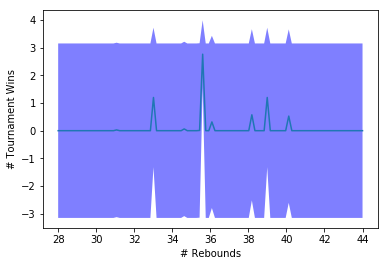

In [5]:
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

x = np.array(df['Rebounds'])
x = x[~np.isnan(x)]
y = y[~np.isnan(y)]
x = x.reshape(-1, 1)

gp.fit(x, y)

xtmp = np.linspace(28, 44, 100).reshape(-1, 1)
ytmp, sigma = gp.predict(xtmp, return_std=True)


plt.plot(xtmp, ytmp)
plt.fill(np.concatenate([xtmp, xtmp[::-1]]),
         np.concatenate([ytmp - 0.1 * sigma,
                        (ytmp + 0.1 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('# Rebounds')
plt.ylabel('# Tournament Wins')

plt.show()

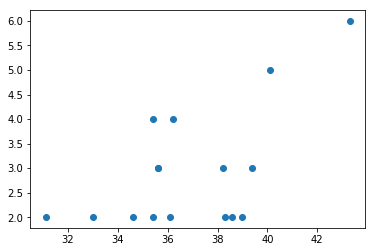

In [6]:
plt.scatter(x, y)